# Age Curves for Goalies in the NHL

In [1]:
#Import the appropriate packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Import the package for LOESS
import statsmodels.api as sm
import os

#Set the working directory
os.chdir("C:\\Users\\justi\\Desktop\\2025\\DSCI 235\\DSCI235-Project\\235_Project")

In [ ]:

#Load in the data
goalie_df = pd.read_csv("goalie_data.csv")

#Look at the data
goalie_df.head()



,Unnamed: 0,Rk,Player,Age,Team,Pos,GP,GS,W,L,...,RBS,GA%-,GSAA,GAA/A,GPS,G,A,PTS,PIM,Awards
0,0,1,Devan Dubnyk,32.0,MIN,G,67,66,31,28,...,13,96.0,6.2,2.69,11.1,0,2,2,2,ASG
1,1,2,Carey Price,31.0,MTL,G,66,64,35,24,...,6,92.0,14.9,2.64,12.5,0,1,1,2,ASnhl-3Vezina-7
2,2,3,Connor Hellebuyck,25.0,WPG,G,63,62,34,23,...,6,97.0,5.9,3.09,12.1,0,3,3,4,NaN
3,3,4,Sergei Bobrovsky,30.0,CBJ,G,62,61,37,24,...,13,97.0,5.3,2.75,10.4,0,0,0,2,ASnhl-11Vezina-9
4,4,5,Martin Jones,29.0,SJS,G,62,62,36,19,...,14,115.0,-22.9,3.14,7.0,0,1,1,2,NaN


656

In [ ]:
#Define the predictor and response
x = goalie_df['Age'].values
y = goalie_df['SV%'].values

#Sort the values by age for plotting later
index = np.argsort(x)
x_g = x[index]
y_g = y[index]

#Fit the loess model using the statsmodels package
#(start with a small smoothing parameter to capture local detail try others later
loess = sm.nonparametric.lowess
goalie_fit = loess(y_g, x_g, frac=frac_val, return_sorted=True)

#Extract the fitted values
x_fit = goalie_fit[:,0]
y_fit = goalie_fit[:,1]

#Use bootstrap sampling to calculate the standard error to include in the plot:

#Set the number of boots and create a place to store the reuslts



c:\Users\justi\anaconda3\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


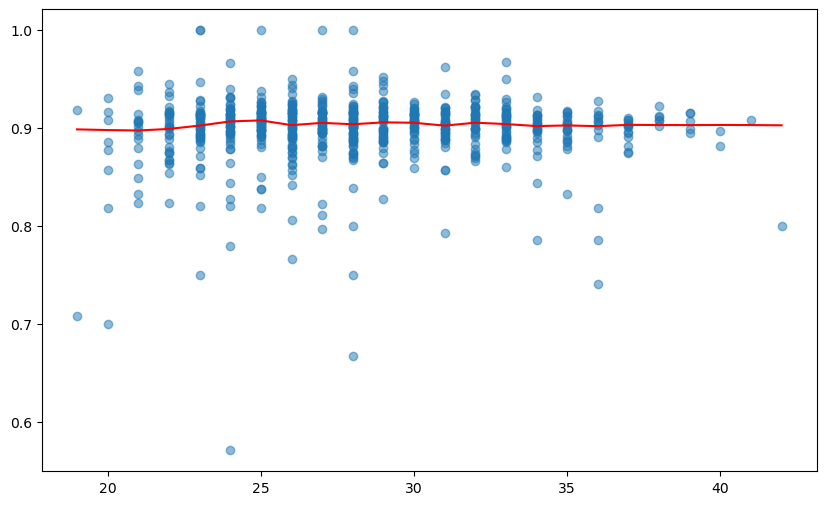

In [22]:
#Plot the results
plt.figure(figsize=(10,6))

#Add the data as a scatter plot
plt.scatter(y=y, x= x, alpha=0.5, label= "Player Data")
plt.plot(x_fit , y_fit, color="red", label= "Loess Fit")

plt.show()

In [19]:
len(x_fit)
len(y_fit)

656

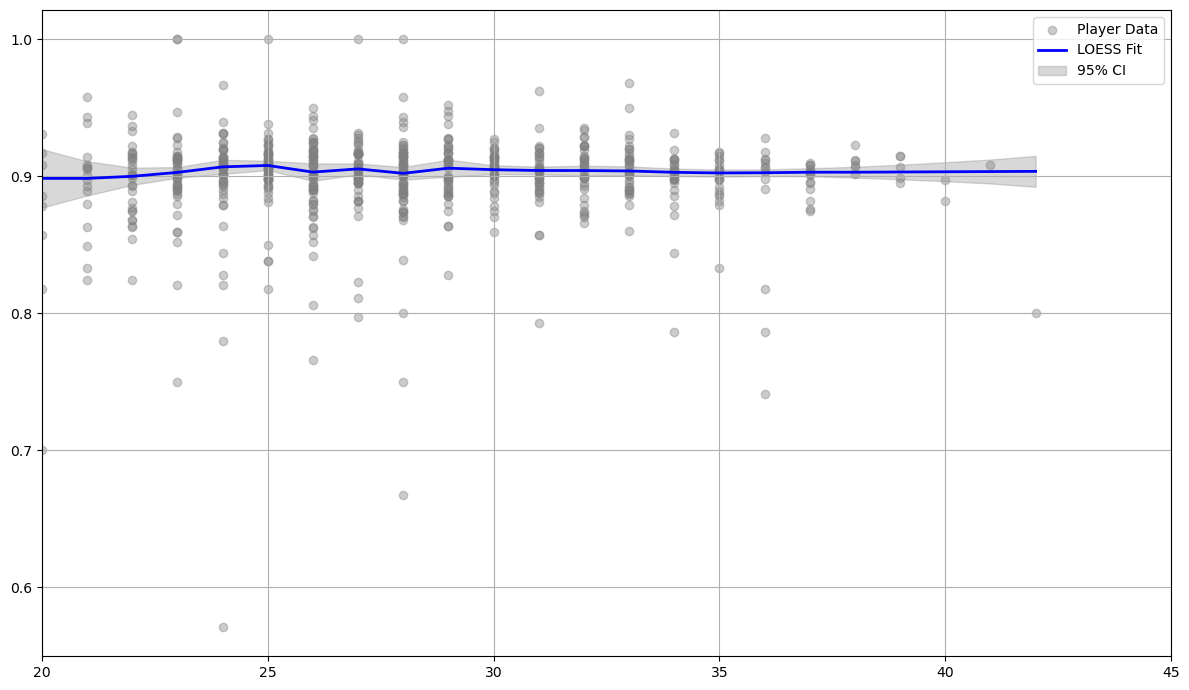

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the goalie data
goalie_df = pd.read_csv("goalie_data.csv")

# Extract Age and SV%
x = goalie_df['Age'].values
y = goalie_df['SV%'].values

# Sort data
index = np.argsort(x)
x_sorted = x[index]
y_sorted = y[index]

# LOESS Fit
lowess = sm.nonparametric.lowess
frac_val = 0.2  # Adjust to match desired smoothness
loess_result = lowess(y_sorted, x_sorted, frac=frac_val, return_sorted=True)
x_fit = loess_result[:, 0]
y_fit = loess_result[:, 1]

n_boot = 200
y_boots = np.full((n_boot, len(x_fit)), np.nan)  # use NaNs to ignore unsupported regions

for i in range(n_boot):
    sample_idx = np.random.choice(len(x_sorted), size=len(x_sorted), replace=True)
    x_sample = x_sorted[sample_idx]
    y_sample = y_sorted[sample_idx]

    # Fit LOESS
    loess_boot = lowess(y_sample, x_sample, frac=frac_val, return_sorted=True)
    x_b = loess_boot[:, 0]
    y_b = loess_boot[:, 1]

    # Interpolate with NaNs outside range
    interp = np.interp(x_fit, x_b, y_b, left=np.nan, right=np.nan)
    y_boots[i, :] = interp

# Compute standard error, ignoring NaNs
y_std = np.nanstd(y_boots, axis=0)

# CI bands
y_upper = y_fit + 1.96 * y_std
y_lower = y_fit - 1.96 * y_std


# Find peak SV% and corresponding age
peak_idx = np.argmax(y_fit)
peak_age = x_fit[peak_idx]
peak_sv = y_fit[peak_idx]

# === Plot ===
plt.figure(figsize=(12, 7))

# Scatter plot of data
plt.scatter(x, y, alpha=0.4, label="Player Data", color='gray')

# LOESS curve
plt.plot(x_fit, y_fit, color='blue', linewidth=2, label='LOESS Fit')

# Confidence interval ribbon
plt.fill_between(x_fit, y_lower, y_upper, color='gray', alpha=0.3, label='95% CI')



plt.xlim(20, 45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
